In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset/data_csv.csv
/kaggle/input/autism-screening-for-toddlers/Toddler Autism dataset July 2018.csv
/kaggle/input/autism-screening-for-toddlers/Toddler data description.docx
/kaggle/input/autism-screening-on-adults/autism_screening.csv


# **Reading Datasets**

In [2]:
data1=pd.read_csv('/kaggle/input/dataset/data_csv.csv')
data2=pd.read_csv('/kaggle/input/autism-screening-for-toddlers/Toddler Autism dataset July 2018.csv')
data3=pd.read_csv('/kaggle/input/autism-screening-on-adults/autism_screening.csv')

In [3]:
data1.head()

,CASE_NO_PATIENT'S,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,Global developmental delay/intellectual disability,Social/Behavioural Issues,Childhood Autism Rating Scale,Anxiety_disorder,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ASD_traits
0,1,0,0,0,0,0,0,1,1,0,...,Yes,Yes,1,Yes,F,middle eastern,Yes,No,Family Member,No
1,2,1,1,0,0,0,1,1,0,0,...,Yes,Yes,2,Yes,M,White European,Yes,No,Family Member,Yes
2,3,1,0,0,0,0,0,1,1,0,...,Yes,Yes,4,Yes,M,Middle Eastern,Yes,No,Family Member,Yes
3,4,1,1,1,1,1,1,1,1,1,...,Yes,Yes,2,Yes,M,Hispanic,No,No,Family Member,Yes
4,5,1,1,0,1,1,1,1,1,1,...,Yes,Yes,1,Yes,F,White European,No,No,Family Member,Yes


In [4]:
data2.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [5]:
data3.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2.0,18 and more,?,NO


In [6]:
print(data1.columns, data1.shape)

print(data2.columns, data2.shape)
print(data3.columns, data3.shape)


Index(['CASE_NO_PATIENT'S', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8',
       'A9', 'A10_Autism_Spectrum_Quotient', 'Social_Responsiveness_Scale',
       'Age_Years', 'Qchat_10_Score', 'Speech Delay/Language Disorder',
       'Learning disorder', 'Genetic_Disorders', 'Depression',
       'Global developmental delay/intellectual disability',
       'Social/Behavioural Issues', 'Childhood Autism Rating Scale',
       'Anxiety_disorder', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who_completed_the_test', 'ASD_traits'],
      dtype='object') (1985, 28)
Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits '],
      dtype='object') (1054, 19)
Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'e

In [7]:
# print(np.array(data1.columns))
common_elements_1_2 = np.intersect1d(np.array(data1.columns), np.array(data2.columns))
common_elements_1_2_3 = np.intersect1d(common_elements_1_2, np.array(data1.columns))
print((common_elements_1_2_3))

['A1' 'A2' 'A3' 'A4' 'A5' 'A6' 'A7' 'A8' 'A9' 'Ethnicity'
 'Family_mem_with_ASD' 'Jaundice' 'Sex']


# **Creating dataframes with similar columns and features**

In [8]:
df1=pd.concat([data1.iloc[:,1:11],data1.iloc[:,[12,22,23,24,25,26,27]]],axis=1)
print(df1.shape)
df1.head()

(1985, 17)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10_Autism_Spectrum_Quotient,Age_Years,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ASD_traits
0,0,0,0,0,0,0,1,1,0,1,2,F,middle eastern,Yes,No,Family Member,No
1,1,1,0,0,0,1,1,0,0,0,3,M,White European,Yes,No,Family Member,Yes
2,1,0,0,0,0,0,1,1,0,1,3,M,Middle Eastern,Yes,No,Family Member,Yes
3,1,1,1,1,1,1,1,1,1,1,2,M,Hispanic,No,No,Family Member,Yes
4,1,1,0,1,1,1,1,1,1,1,2,F,White European,No,No,Family Member,Yes


In [9]:
df2=pd.concat([data2.iloc[:,1:12],data2.iloc[:,13:]],axis=1)
df2['Age_Mons']=(df2['Age_Mons']/12).astype(int)
print(df2.shape)
df2.head()

(1054, 17)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,2,f,middle eastern,yes,no,family member,No
1,1,1,0,0,0,1,1,0,0,0,3,m,White European,yes,no,family member,Yes
2,1,0,0,0,0,0,1,1,0,1,3,m,middle eastern,yes,no,family member,Yes
3,1,1,1,1,1,1,1,1,1,1,2,m,Hispanic,no,no,family member,Yes
4,1,1,0,1,1,1,1,1,1,1,1,f,White European,no,yes,family member,Yes


In [10]:
df3=pd.concat([data3.iloc[:,0:15],data3.iloc[:,-2:]],axis=1)
print(df3.shape)
df3.head()

(704, 17)


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,f,White-European,no,no,Self,NO
1,1,1,0,1,0,0,0,1,0,1,24.0,m,Latino,no,yes,Self,NO
2,1,1,0,1,1,0,1,1,1,1,27.0,m,Latino,yes,yes,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,35.0,f,White-European,no,yes,Self,NO
4,1,0,0,0,0,0,0,1,0,0,40.0,f,?,no,no,?,NO


In [11]:
order_test= pd.DataFrame({
    'df1': df1.columns,
    'df2': df2.columns ,
    'df3': df3.columns
})
order_test

,df1,df2,df3
0,A1,A1,A1_Score
1,A2,A2,A2_Score
2,A3,A3,A3_Score
3,A4,A4,A4_Score
4,A5,A5,A5_Score
5,A6,A6,A6_Score
6,A7,A7,A7_Score
7,A8,A8,A8_Score
8,A9,A9,A9_Score
9,A10_Autism_Spectrum_Quotient,A10,A10_Score


**All columns are in order, now we just join dfs on axis 0**

In [12]:
# Rename columns to have the same names in all DataFrames
df2.columns = df3.columns = df1.columns

# Concatenate the DataFrames
data_fin = pd.concat([df3, df2, df1], axis=0)
data_fin.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10_Autism_Spectrum_Quotient,Age_Years,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ASD_traits
0,1,1,1,1,0,0,1,1,0,0,26.0,f,White-European,no,no,Self,NO
1,1,1,0,1,0,0,0,1,0,1,24.0,m,Latino,no,yes,Self,NO
2,1,1,0,1,1,0,1,1,1,1,27.0,m,Latino,yes,yes,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,35.0,f,White-European,no,yes,Self,NO
4,1,0,0,0,0,0,0,1,0,0,40.0,f,?,no,no,?,NO


In [13]:
data_fin.shape

(3743, 17)

In [14]:
# Get object type columns
object_cols = data_fin.select_dtypes('O').columns

# Create new DataFrame
object_df = pd.DataFrame({
    'Objects': object_cols,
    'Unique values': [data_fin[col].unique() for col in object_cols],
    'number of unique values':[data_fin[col].nunique()for col in object_cols]
})

object_df

,Objects,Unique values,number of unique values
0,Sex,"[f, m, F, M]",4
1,Ethnicity,"[White-European, Latino, ?, Others, Black, Asi...",23
2,Jaundice,"[no, yes, Yes, No]",4
3,Family_mem_with_ASD,"[no, yes, No, Yes]",4
4,Who_completed_the_test,"[Self, Parent, ?, Health care professional, Re...",11
5,ASD_traits,"[NO, YES, No, Yes]",4


In [15]:
data_fin.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9',
       'A10_Autism_Spectrum_Quotient', 'Age_Years', 'Sex', 'Ethnicity',
       'Jaundice', 'Family_mem_with_ASD', 'Who_completed_the_test',
       'ASD_traits'],
      dtype='object')

In [16]:
for col in ['Sex', 'Ethnicity',
       'Jaundice', 'Family_mem_with_ASD', 'Who_completed_the_test',
       'ASD_traits']:
    print("-------------------------------")
    print(f'Column name: {col}\n')
    print(f'Unique values:\n{data_fin[col].unique()}')

-------------------------------
Column name: Sex

Unique values:
['f' 'm' 'F' 'M']
-------------------------------
Column name: Ethnicity

Unique values:
['White-European' 'Latino' '?' 'Others' 'Black' 'Asian' 'Middle Eastern '
 'Pasifika' 'South Asian' 'Hispanic' 'Turkish' 'others' 'middle eastern'
 'White European' 'black' 'asian' 'south asian' 'Native Indian' 'mixed'
 'Pacifica' 'Middle Eastern' 'Mixed' 'PaciFica']
-------------------------------
Column name: Jaundice

Unique values:
['no' 'yes' 'Yes' 'No']
-------------------------------
Column name: Family_mem_with_ASD

Unique values:
['no' 'yes' 'No' 'Yes']
-------------------------------
Column name: Who_completed_the_test

Unique values:
['Self' 'Parent' '?' 'Health care professional' 'Relative' 'Others'
 'family member' 'Health Care Professional' 'Family Member'
 'Family member' 'School and NGO']
-------------------------------
Column name: ASD_traits

Unique values:
['NO' 'YES' 'No' 'Yes']


In [17]:
replacements = {
    'f': 'F',
    'm': 'M',
}
data_fin['Sex'] = data_fin['Sex'].replace(replacements)

In [18]:
replacements = {
    'yes': 'Yes',
    'no': 'No',
}
data_fin['Jaundice'] = data_fin['Jaundice'].replace(replacements)

In [19]:
replacements = {
    'yes': 'Yes',
    'no': 'No',
}
data_fin['Family_mem_with_ASD'] = data_fin['Family_mem_with_ASD'].replace(replacements)

In [20]:
replacements = {
    'YES': 'Yes',
    'NO': 'No',
}
data_fin['ASD_traits'] = data_fin['ASD_traits'].replace(replacements)

In [21]:
replacements = {
    'middle eastern': 'Middle Eastern',
    'Middle Eastern ': 'Middle Eastern',
    'mixed': 'Mixed',
    'asian': 'Asian',
    'black': 'Black',
    'south asian': 'South Asian',
    'PaciFica':'Pacifica',
    'Pasifika':'Pacifica'
    
}
data_fin['Ethnicity'] = data_fin['Ethnicity'].replace(replacements)

In [22]:
replacements = {
    'Health care professional':'Health Care Professional',
    'family member':'Family Member',
    'Family member':'Family Member'
}
data_fin['Who_completed_the_test'] = data_fin['Who_completed_the_test'].replace(replacements)

In [23]:
for col in ['Sex', 'Ethnicity',
       'Jaundice', 'Family_mem_with_ASD', 'Who_completed_the_test',
       'ASD_traits']:
    print("-------------------------------")
    print(f'Column name: {col}\n')
    print(f'Unique values:\n{data_fin[col].unique()}')

-------------------------------
Column name: Sex

Unique values:
['F' 'M']
-------------------------------
Column name: Ethnicity

Unique values:
['White-European' 'Latino' '?' 'Others' 'Black' 'Asian' 'Middle Eastern'
 'Pacifica' 'South Asian' 'Hispanic' 'Turkish' 'others' 'White European'
 'Native Indian' 'Mixed']
-------------------------------
Column name: Jaundice

Unique values:
['No' 'Yes']
-------------------------------
Column name: Family_mem_with_ASD

Unique values:
['No' 'Yes']
-------------------------------
Column name: Who_completed_the_test

Unique values:
['Self' 'Parent' '?' 'Health Care Professional' 'Relative' 'Others'
 'Family Member' 'School and NGO']
-------------------------------
Column name: ASD_traits

Unique values:
['No' 'Yes']


In [24]:
data_fin['Ethnicity'].replace('?', np.nan, inplace=True)
data_fin['Who_completed_the_test'].replace('?', np.nan, inplace=True)

In [25]:
pd.DataFrame(data_fin.isnull().sum(), 
             columns=["Missing Values"]).style.bar(color = "#84A9AC")

,Missing Values
A1,0
A2,0
A3,0
A4,0
A5,0
A6,0
A7,0
A8,0
A9,0
A10_Autism_Spectrum_Quotient,0


In [26]:
idf=data_fin.copy()
from sklearn.impute import SimpleImputer

In [27]:
imp = SimpleImputer(strategy='most_frequent')
imputed_data = pd.DataFrame(imp.fit_transform(idf))
imputed_data.columns = idf.columns
imputed_data.index = idf.index

In [28]:
pd.DataFrame(imputed_data.isnull().sum(), 
             columns=["Missing Values"]).style.bar(color = "#84A9AC")

/opt/conda/lib/python3.10/site-packages/pandas/io/formats/style.py:3851: RuntimeWarning: invalid value encountered in long_scalars
  end = (x - left) / (right - left)


,Missing Values
A1,0
A2,0
A3,0
A4,0
A5,0
A6,0
A7,0
A8,0
A9,0
A10_Autism_Spectrum_Quotient,0


# **Now I wanna filter the final dataset based on age groups**
age groups will be: 
* 0-10 children
* 11-15 adolescent
* 16-24 young
* more than 25 adults

In [29]:
imputed_data.shape

(3743, 17)

In [30]:
imputed_data

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10_Autism_Spectrum_Quotient,Age_Years,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ASD_traits
0,1,1,1,1,0,0,1,1,0,0,26.0,F,White-European,No,No,Self,No
1,1,1,0,1,0,0,0,1,0,1,24.0,M,Latino,No,Yes,Self,No
2,1,1,0,1,1,0,1,1,1,1,27.0,M,Latino,Yes,Yes,Parent,Yes
3,1,1,0,1,0,0,1,1,0,1,35.0,F,White-European,No,Yes,Self,No
4,1,0,0,0,0,0,0,1,0,0,40.0,F,Asian,No,No,Family Member,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1980,0,0,0,0,0,0,0,0,0,1,7.0,M,Middle Eastern,No,No,Health Care Professional,No
1981,0,0,0,0,0,0,0,0,0,0,14.0,F,South Asian,No,No,Health Care Professional,No
1982,0,0,0,0,0,0,0,0,0,1,7.0,M,White European,No,No,Health Care Professional,Yes
1983,0,0,0,0,0,0,0,0,0,0,14.0,M,Middle Eastern,No,No,Health Care Professional,No


In [31]:
data = imputed_data.copy()

In [32]:
data.shape

(3743, 17)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [34]:
lr = LinearRegression()
dtc = DecisionTreeClassifier()
gclf1 =GaussianNB()
mclf2 = MultinomialNB()
bclf3 =  BernoulliNB()
knn = KNeighborsClassifier()
lgr = LogisticRegression()
rfc = RandomForestClassifier(max_depth = 10, random_state=0)

In [35]:
data = pd.get_dummies(data, columns= ['Ethnicity', 'Who_completed_the_test'], drop_first =  True)
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10_Autism_Spectrum_Quotient,...,Ethnicity_Turkish,Ethnicity_White European,Ethnicity_White-European,Ethnicity_others,Who_completed_the_test_Health Care Professional,Who_completed_the_test_Others,Who_completed_the_test_Parent,Who_completed_the_test_Relative,Who_completed_the_test_School and NGO,Who_completed_the_test_Self
0,1,1,1,1,0,0,1,1,0,0,...,False,False,True,False,False,False,False,False,False,True
1,1,1,0,1,0,0,0,1,0,1,...,False,False,False,False,False,False,False,False,False,True
2,1,1,0,1,1,0,1,1,1,1,...,False,False,False,False,False,False,True,False,False,False
3,1,1,0,1,0,0,1,1,0,1,...,False,False,True,False,False,False,False,False,False,True
4,1,0,0,0,0,0,0,1,0,0,...,False,False,False,False,False,False,False,False,False,False


In [36]:
data['Sex'].replace({"M":1, "F":0}, inplace = True)
data['Jaundice'].replace({"Yes":1, "No":0}, inplace = True)
data['Family_mem_with_ASD'].replace({"Yes":1, "No":0}, inplace = True)
# data['ASD_traits'].replace({"Yes":1, "No":0}, inplace = True)
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10_Autism_Spectrum_Quotient,...,Ethnicity_Turkish,Ethnicity_White European,Ethnicity_White-European,Ethnicity_others,Who_completed_the_test_Health Care Professional,Who_completed_the_test_Others,Who_completed_the_test_Parent,Who_completed_the_test_Relative,Who_completed_the_test_School and NGO,Who_completed_the_test_Self
0,1,1,1,1,0,0,1,1,0,0,...,False,False,True,False,False,False,False,False,False,True
1,1,1,0,1,0,0,0,1,0,1,...,False,False,False,False,False,False,False,False,False,True
2,1,1,0,1,1,0,1,1,1,1,...,False,False,False,False,False,False,True,False,False,False
3,1,1,0,1,0,0,1,1,0,1,...,False,False,True,False,False,False,False,False,False,True
4,1,0,0,0,0,0,0,1,0,0,...,False,False,False,False,False,False,False,False,False,False


In [37]:
y = data['ASD_traits']
x = data.drop(columns = ['ASD_traits'])

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, random_state=12, test_size=0.2)

In [39]:
X_train.shape, X_test.shape

((2994, 33), (749, 33))

In [40]:
dtc.fit(X_train, Y_train)
y_pred_dtc = dtc.predict(X_test)

In [41]:
# NB
gclf1.fit(X_train, Y_train)
mclf2.fit(X_train, Y_train)
bclf3.fit(X_train, Y_train)

y_pred_gclf1=  gclf1.predict(X_test)
y_pred_mclf2=  mclf2.predict(X_test)
y_pred_bclf3=  bclf3.predict(X_test)

In [42]:
#knn
knn.fit(X_train, Y_train)
y_pred_knn= knn.predict(X_test)

In [43]:
#logistic regression
lgr.fit(X_train,Y_train)
Y_pred_lgr = lgr.predict(X_test)

In [44]:
# Random Forest
rfc.fit(X_train, Y_train)
Y_pred_rfc = rfc.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [46]:
print("Decision Tree Classifier: ",accuracy_score(Y_test, y_pred_dtc))
print("GuassianNB: ",accuracy_score(Y_test, y_pred_gclf1))
print("MultinomialNB: ",accuracy_score(Y_test, y_pred_mclf2))
print("BernoulliNB: ",accuracy_score(Y_test, y_pred_bclf3))
print("KNN Classifier: ",accuracy_score(Y_test, y_pred_knn))
print("Logistic Regression: ",accuracy_score(Y_test, Y_pred_lgr))    
print("Random Forest Classifier: ",accuracy_score(Y_test, Y_pred_rfc))   
print("Confusion matrix of RFC: "), confusion_matrix(Y_test, Y_pred_rfc)

Decision Tree Classifier:  0.9265687583444593
GuassianNB:  0.7823765020026703
MultinomialNB:  0.7596795727636849
BernoulliNB:  0.8331108144192256
KNN Classifier:  0.9265687583444593
Logistic Regression:  0.8638184245660881
Random Forest Classifier:  0.9732977303070761
Confusion matrix of RFC: 


(None,
 array([[329,  13],
        [  7, 400]]))

In [47]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

In [48]:
classifier3 = SVC(probability=True)
voting_classifier = VotingClassifier(estimators=[
('dtc', dtc),
# ('gclf1', gclf1),
# ('mclf2', mclf2),
# ('bclf3', bclf3),
('knn', knn),
('lgr', lgr),
('rfc', rfc),
('svm', classifier3)
], voting='soft')
voting_classifier.fit(X_train, Y_train)
y_pred = voting_classifier.predict(X_test)

# Calculate the accuracy of the ensemble
accuracy = accuracy_score(Y_test, y_pred)
print("Ensemble Accuracy:", accuracy)

Ensemble Accuracy: 0.9492656875834445


In [49]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_trained_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)
X_trained_scaled[0]


array([ 1.10651186, -0.70657545,  1.48280746, -0.78692671, -0.79641665,
       -0.77915682, -0.89281513,  1.29260575, -0.7055132 , -1.01684187,
        1.07799823,  0.68858599, -1.0134505 , -0.56835072, -0.20698361,
       -0.15808682, -0.14178228, -0.47174126, -0.06343615, -0.04089988,
       -0.1656915 , -0.0879858 , -0.32183129, -0.03657585, -0.55291323,
       -0.26103884,  0.        , -0.71189477, -0.0549097 , -0.11783117,
       -0.07777138, -0.09176243,  2.43857248])

In [51]:
print(Y_train.unique())

['No' 'Yes']


In [52]:
X_trained_scaled
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Y_train_encoded= label_encoder.fit_transform(Y_train)
Y_test_encoded= label_encoder.fit_transform(Y_test)

Y_train_encoded, Y_test_encoded

(array([0, 0, 0, ..., 0, 1, 0]),
 array([0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
        1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
        1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
        0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
        1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
        0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
        1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
     

In [53]:
model = Sequential()

# model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu', input_shape=(X_trained_scaled.shape[1],) ))
model.add(Dense(128,activation='relu'))
model.add(Dense(2,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               4352      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 2)                 258       
                                                                 
Total params: 21,122
Trainable params: 21,122
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
history = model.fit(X_trained_scaled,Y_train_encoded,epochs=50)
y_prob = model.predict(X_test_scaled)

Epoch 1/50
94/94 [==============================] - 1s 2ms/step - loss: 0.2733 - accuracy: 0.8751
Epoch 2/50
94/94 [==============================] - 0s 2ms/step - loss: 0.1218 - accuracy: 0.9572
Epoch 3/50
94/94 [==============================] - 0s 2ms/step - loss: 0.0805 - accuracy: 0.9803
Epoch 4/50
94/94 [==============================] - 0s 2ms/step - loss: 0.0601 - accuracy: 0.9853
Epoch 5/50
94/94 [==============================] - 0s 2ms/step - loss: 0.0497 - accuracy: 0.9856
Epoch 6/50
94/94 [==============================] - 0s 2ms/step - loss: 0.0358 - accuracy: 0.9893
Epoch 7/50
94/94 [==============================] - 0s 2ms/step - loss: 0.0287 - accuracy: 0.9906
Epoch 8/50
94/94 [==============================] - 0s 2ms/step - loss: 0.0219 - accuracy: 0.9953
Epoch 9/50
94/94 [==============================] - 0s 2ms/step - loss: 0.0189 - accuracy: 0.9963
Epoch 10/50
94/94 [==============================] - 0s 2ms/step - loss: 0.0182 - accuracy: 0.9950
Epoch 11/50
94/94 [

In [55]:
y_pred2 = y_prob.argmax(axis=1)
print(y_pred2,"\n", Y_test_encoded, Y_test_encoded.shape)

[0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 1 0 0 0 1
 0 0 1 1 1 1 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1
 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 1 1 0 0 1 1 1 0 1 0 1 1 0 1 1 0 1 0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1
 1 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 1 1
 0 1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1
 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 0 1 0 0 0 1 1 1 1
 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1
 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1
 0 0 1 1 0 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1
 1 0 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1
 1 0 1 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1 0 1
 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 1
 1 1 1 0 0 0 1 1 0 0 1 0 

In [56]:
print("ConfusionMatrix of ANN: : ",confusion_matrix(Y_test_encoded, y_pred2))
print("Accuracy Score of ANN: ",accuracy_score(Y_test_encoded, y_pred2))

ConfusionMatrix of ANN: :  [[332  10]
 [  1 406]]
Accuracy Score of ANN:  0.9853137516688919


In [57]:
df_child=imputed_data[imputed_data['Age_Years']<=10].reset_index().drop("index", axis = 1)
df_child

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10_Autism_Spectrum_Quotient,Age_Years,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ASD_traits
0,0,0,0,0,0,0,1,1,0,1,2.0,F,Middle Eastern,Yes,No,Family Member,No
1,1,1,0,0,0,1,1,0,0,0,3.0,M,White European,Yes,No,Family Member,Yes
2,1,0,0,0,0,0,1,1,0,1,3.0,M,Middle Eastern,Yes,No,Family Member,Yes
3,1,1,1,1,1,1,1,1,1,1,2.0,M,Hispanic,No,No,Family Member,Yes
4,1,1,0,1,1,1,1,1,1,1,1.0,F,White European,No,Yes,Family Member,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2221,0,0,0,0,0,0,0,0,0,1,7.0,M,Middle Eastern,No,No,Health Care Professional,No
2222,0,0,0,0,0,0,0,0,0,1,7.0,F,Asian,No,No,Health Care Professional,No
2223,0,0,0,0,0,0,0,0,0,1,7.0,M,Middle Eastern,No,No,Health Care Professional,No
2224,0,0,0,0,0,0,0,0,0,1,7.0,M,White European,No,No,Health Care Professional,Yes


In [58]:
data_child = df_child.copy()

In [59]:
data_child.shape

(2226, 17)

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
# for i in data_child['Who_completed_the_test'].unique():
# #     print(i)
#     print(f"For :{i} ", data_child[i].value_counts())
# data_child['Who_completed_the_test'].describe()
# data_child['Who_completed_the_test'].unique()

data_child['Ethnicity'].value_counts()

Ethnicity
White European    661
Asian             651
Middle Eastern    418
South Asian       206
Black              88
Others             66
Hispanic           64
Latino             41
Mixed              14
Pacifica           13
Native Indian       4
Name: count, dtype: int64

In [62]:
data_child["ASD_traits"].value_counts()

ASD_traits
Yes    1372
No      854
Name: count, dtype: int64

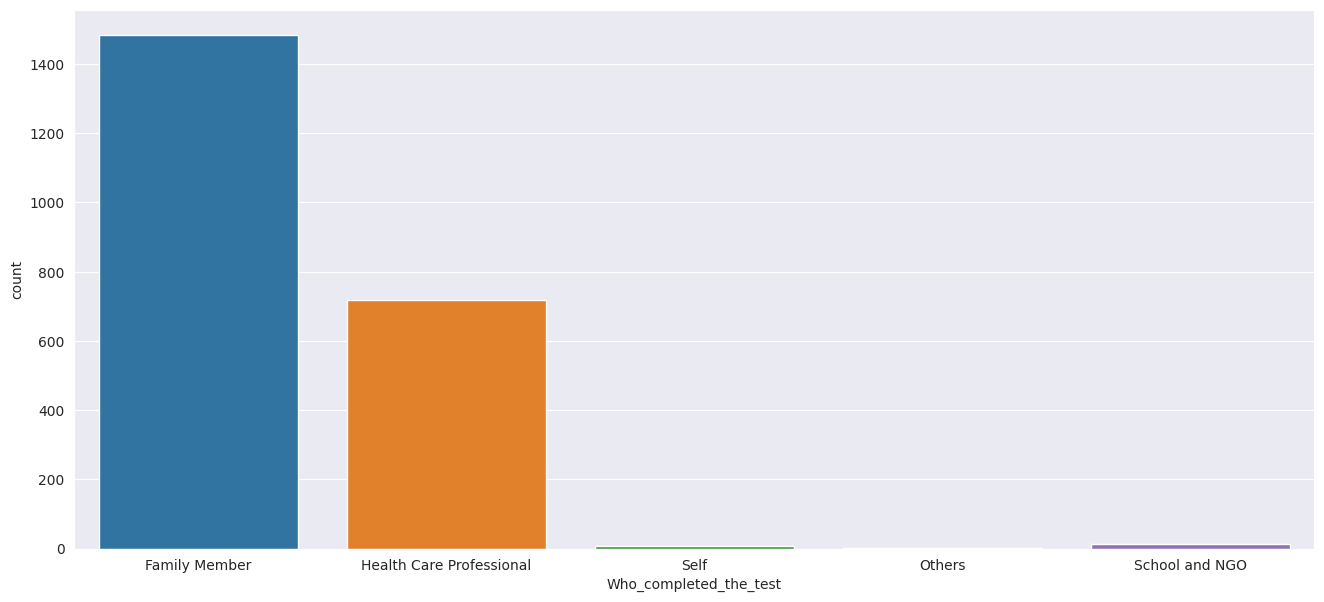

In [63]:
plt.figure(figsize = (16,7))
sns.countplot(x = 'Who_completed_the_test', data = data_child)
plt.show()

In [64]:
np.size(np.array(data_child.columns)), data_child.columns, data_child.ASD_traits.describe()

(17,
 Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9',
        'A10_Autism_Spectrum_Quotient', 'Age_Years', 'Sex', 'Ethnicity',
        'Jaundice', 'Family_mem_with_ASD', 'Who_completed_the_test',
        'ASD_traits'],
       dtype='object'),
 count     2226
 unique       2
 top        Yes
 freq      1372
 Name: ASD_traits, dtype: object)

In [65]:
data_child = pd.get_dummies(data_child, columns= ['Ethnicity', 'Who_completed_the_test'], drop_first =  True)
data_child.head()


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10_Autism_Spectrum_Quotient,...,Ethnicity_Mixed,Ethnicity_Native Indian,Ethnicity_Others,Ethnicity_Pacifica,Ethnicity_South Asian,Ethnicity_White European,Who_completed_the_test_Health Care Professional,Who_completed_the_test_Others,Who_completed_the_test_School and NGO,Who_completed_the_test_Self
0,0,0,0,0,0,0,1,1,0,1,...,False,False,False,False,False,False,False,False,False,False
1,1,1,0,0,0,1,1,0,0,0,...,False,False,False,False,False,True,False,False,False,False
2,1,0,0,0,0,0,1,1,0,1,...,False,False,False,False,False,False,False,False,False,False
3,1,1,1,1,1,1,1,1,1,1,...,False,False,False,False,False,False,False,False,False,False
4,1,1,0,1,1,1,1,1,1,1,...,False,False,False,False,False,True,False,False,False,False


In [66]:
data_child['Sex'].replace({"M":1, "F":0}, inplace = True)
data_child['Jaundice'].replace({"Yes":1, "No":0}, inplace = True)
data_child['Family_mem_with_ASD'].replace({"Yes":1, "No":0}, inplace = True)
# data['ASD_traits'].replace({"Yes":1, "No":0}, inplace = True)
data_child.head()
data_child.shape

(2226, 29)

In [67]:
y_child = data_child['ASD_traits']
x_child = data_child.drop(columns = ['ASD_traits'])

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(x_child, y_child, random_state=12, test_size=0.2)

In [69]:
X_train.shape, X_test.shape

((1780, 28), (446, 28))

In [70]:
Y_test_net = Y_test.replace({"Yes":1, "No":0})
Y_train_net = Y_train.replace({"Yes":1, "No":0})
Y_test_net

1329    1
91      0
733     1
1430    1
784     0
       ..
1262    0
1925    0
1006    1
821     0
36      0
Name: ASD_traits, Length: 446, dtype: int64

In [71]:
dtc.fit(X_train, Y_train)
# y_score_dtc = dtc.predict_proba(X_test)[:,1]
y_pred_dtc = dtc.predict(X_test)


# NB
gclf1.fit(X_train, Y_train)
mclf2.fit(X_train, Y_train)
bclf3.fit(X_train, Y_train)

y_pred_gclf1=  gclf1.predict(X_test)
y_pred_mclf2=  mclf2.predict(X_test)
y_pred_bclf3=  bclf3.predict(X_test)

#knn
knn.fit(X_train, Y_train)
y_pred_knn= knn.predict(X_test)
y_score_knn = knn.predict_proba(X_test)[:,1]

#logistic regression
lgr.fit(X_train,Y_train)
Y_pred_lgr = lgr.predict(X_test)
y_score_lgr = lgr.predict_proba(X_test)[:,1]
# y_score_ = dtc.predict_proba(X_test)

# Random Forest
rfc.fit(X_train, Y_train)
Y_pred_rfc = rfc.predict(X_test)
y_score_rfc = rfc.predict_proba(X_test)



In [72]:
from sklearn.metrics import roc_curve

In [73]:
y_score_lgr

array([0.99115841, 0.45718358, 0.99155433, 0.99988053, 0.30794055,
       0.99961957, 0.08238359, 0.20116167, 0.99811353, 0.99090827,
       0.44984596, 0.08357095, 0.79572487, 0.97866713, 0.93473809,
       0.02885494, 0.9984753 , 0.36576968, 0.99882153, 0.99869895,
       0.026689  , 0.95282008, 0.66948826, 0.9991882 , 0.99975326,
       0.99934286, 0.99820552, 0.02239579, 0.98947696, 0.33929563,
       0.95640682, 0.83999632, 0.36576968, 0.03753021, 0.23817935,
       0.18883883, 0.92130851, 0.99478194, 0.17614599, 0.99110724,
       0.1729777 , 0.85428696, 0.29871928, 0.94118445, 0.99940604,
       0.99882015, 0.72896478, 0.12766851, 0.10688608, 0.99907164,
       0.84662612, 0.99899691, 0.09987469, 0.57463342, 0.19106793,
       0.91961113, 0.00471076, 0.99688769, 0.91659685, 0.17054753,
       0.99852955, 0.06974781, 0.07976703, 0.32192095, 0.99974688,
       0.98053905, 0.82954002, 0.57463342, 0.9870255 , 0.99923837,
       0.97003674, 0.08613321, 0.98981499, 0.99854228, 0.85790

In [74]:
fpr_lgr, tpr_lgr, thresholds_lgr = roc_curve(Y_test_net, y_score_lgr)
# fpr, tpr, thresholds = roc_curve(Y_test_net, y_score_dtc)  

In [75]:
thresholds_lgr

array([1.99997287, 0.99997287, 0.99988053, 0.99985859, 0.99977067,
       0.99975326, 0.99622236, 0.99602943, 0.99322727, 0.99319179,
       0.96139786, 0.96103809, 0.92956925, 0.92487347, 0.91169104,
       0.90647015, 0.90120423, 0.90099334, 0.88981033, 0.88783727,
       0.86277735, 0.85790032, 0.85015831, 0.84662612, 0.83999632,
       0.83679397, 0.82954002, 0.82253276, 0.80268725, 0.80091981,
       0.77770078, 0.7462677 , 0.73598483, 0.73207794, 0.72896478,
       0.72158584, 0.71792586, 0.70774116, 0.70307341, 0.67556414,
       0.66948826, 0.65606536, 0.64377211, 0.63233524, 0.62556828,
       0.6194985 , 0.60017876, 0.59928065, 0.59529794, 0.58490284,
       0.58369006, 0.57463342, 0.55533685, 0.47099363, 0.46934601,
       0.45718358, 0.4432098 , 0.42483736, 0.40352081, 0.39541464,
       0.39000049, 0.38735992, 0.37408725, 0.36576968, 0.33771327,
       0.32596383, 0.28790811, 0.28124935, 0.25841284, 0.24873766,
       0.24619116, 0.24048026, 0.23817935, 0.23734803, 0.23605

In [76]:
import plotly.graph_objects as go
trace0 = go.Scatter(
    x = fpr_lgr,
    y = tpr_lgr,
    mode = 'lines',
    name = 'ROC curve'
)

n = 10
indices = np.arange(len(thresholds_lgr))%n == 0

trace1 = go.Scatter(
    x = fpr_lgr[indices],
    y = tpr_lgr[indices],
    mode = 'markers+text',
    name = 'Threshold Points',
    text = [f"Thr={thr:.2f}" for thr in thresholds_lgr[indices] ],
    textposition = 'top center'
    
)

trace2 = go.Scatter(
    x = [0,1],
    y = [0,1],
    mode = 'lines',
    name = 'Random (Area = 0.5)',
    line = dict(dash= 'dash')
    
)

data = [trace0, trace1, trace2]

layout = go.Layout(
    title='Receiver Operating Characteristic',
    xaxis=dict(title='False Positive Rate'),
    yaxis=dict(title='True Positive Rate'),
    autosize=False,
    width=800,
    height=800,
    showlegend=False
)

# Define figure and add data
fig = go.Figure(data=data, layout=layout)

# Show figure
fig.show()

In [77]:
from sklearn.metrics import precision_recall_fscore_support

In [78]:
print("Decision Tree Classifier: ",accuracy_score(Y_test, y_pred_dtc))
print("GuassianNB: ",accuracy_score(Y_test, y_pred_gclf1))
print("MultinomialNB: ",accuracy_score(Y_test, y_pred_mclf2))
print("BernoulliNB: ",accuracy_score(Y_test, y_pred_bclf3))
print("KNN Classifier: ",accuracy_score(Y_test, y_pred_knn))
print("Logistic Regression: ",accuracy_score(Y_test, Y_pred_lgr))    
print("Random Forest Classifier: ",accuracy_score(Y_test, Y_pred_rfc))    
print("CMatrix for rfc: \n", confusion_matrix(Y_test, Y_pred_rfc))

Decision Tree Classifier:  0.9282511210762332
GuassianNB:  0.7892376681614349
MultinomialNB:  0.7982062780269058
BernoulliNB:  0.8587443946188341
KNN Classifier:  0.9372197309417041
Logistic Regression:  0.852017937219731
Random Forest Classifier:  0.9663677130044843
CMatrix for rfc: 
 [[179  12]
 [  3 252]]


In [79]:
precision, recall, f1_score, support = precision_recall_fscore_support(Y_test, Y_pred_rfc)
print("Precision is : ", precision)
print("Recall is : ", recall)
print("f1 score is : ", f1_score)

Precision is :  [0.98351648 0.95454545]
Recall is :  [0.93717277 0.98823529]
f1 score is :  [0.95978552 0.97109827]


In [80]:
confusion_matrix(Y_test, Y_pred_rfc)

array([[179,  12],
       [  3, 252]])

In [81]:
classifier3 = SVC(probability=True)
voting_classifier = VotingClassifier(estimators=[
('dtc', dtc),
('gclf1', gclf1),
('mclf2', mclf2),
('bclf3', bclf3),
('knn', knn),
('lgr', lgr),
('rfc', rfc),
('svm', classifier3)
], voting='soft')
voting_classifier.fit(X_train, Y_train)
y_pred = voting_classifier.predict(X_test)

# Calculate the accuracy of the ensemble
accuracy = accuracy_score(Y_test, y_pred)
print("Ensemble Accuracy:", accuracy)

Ensemble Accuracy: 0.9170403587443946


In [82]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_trained_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)
X_trained_scaled[0]

array([-0.88923814,  1.35773726, -0.68900707, -0.80982341,  1.19237943,
        1.11310094,  0.99439772,  1.34941438,  1.29798544, -1.12455815,
       -0.8550323 ,  0.61111111, -1.10805448, -0.61024408, -0.19929783,
       -0.17856108, -0.13313307, -0.46637995, -0.06283399, -0.0474579 ,
       -0.18188412, -0.07128727, -0.31534759,  1.53573779, -0.68989388,
       -0.03353892, -0.08238526, -0.05307449])

In [83]:
print(Y_train.unique())

['Yes' 'No']


In [84]:
#Different types of hidden layer
# acclist = []
for i in range(5, 129, 5):
    print(i)
#     model = Sequential()
#     model.add(Dense(128,activation='relu', input_shape=(X_trained_scaled.shape[1],) ))
#     model.add(Dense(i,activation='relu'))
#     model.add(Dense(2,activation='sigmoid'))
#     model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
#     history = model.fit(X_trained_scaled,Y_train_encoded,epochs=50)
#     y_prob = model.predict(X_test_scaled)
#     y_pred2 = y_prob.argmax(axis=1)
# #     print(f"Accuracy Score of ANN at {i}: ",accuracy_score(Y_test_encoded, y_pred2))
#     acclist.append(accuracy_score(Y_test_encoded, y_pred2))
# print(acclist)

5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125


In [85]:
model = Sequential()

# model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu', input_shape=(X_trained_scaled.shape[1],) ))
model.add(Dense(100,activation='relu'))
model.add(Dense(2,activation='sigmoid'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               3712      
                                                                 
 dense_4 (Dense)             (None, 100)               12900     
                                                                 
 dense_5 (Dense)             (None, 2)                 202       
                                                                 
Total params: 16,814
Trainable params: 16,814
Non-trainable params: 0
_________________________________________________________________


In [86]:
X_trained_scaled
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Y_train_encoded= label_encoder.fit_transform(Y_train)
Y_test_encoded= label_encoder.fit_transform(Y_test)
Y_train_encoded, Y_test_encoded

(array([1, 1, 0, ..., 0, 0, 1]),
 array([1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
        1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
        1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
        1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
        0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
        0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
        0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
        0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
        0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
        0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
     

In [87]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
history = model.fit(X_trained_scaled,Y_train_encoded,epochs=50)
y_prob = model.predict(X_test_scaled)

Epoch 1/50
56/56 [==============================] - 1s 2ms/step - loss: 0.2993 - accuracy: 0.8601
Epoch 2/50
56/56 [==============================] - 0s 2ms/step - loss: 0.1477 - accuracy: 0.9455
Epoch 3/50
56/56 [==============================] - 0s 2ms/step - loss: 0.0912 - accuracy: 0.9713
Epoch 4/50
56/56 [==============================] - 0s 2ms/step - loss: 0.0608 - accuracy: 0.9860
Epoch 5/50
56/56 [==============================] - 0s 2ms/step - loss: 0.0404 - accuracy: 0.9916
Epoch 6/50
56/56 [==============================] - 0s 2ms/step - loss: 0.0319 - accuracy: 0.9927
Epoch 7/50
56/56 [==============================] - 0s 2ms/step - loss: 0.0239 - accuracy: 0.9949
Epoch 8/50
56/56 [==============================] - 0s 2ms/step - loss: 0.0198 - accuracy: 0.9949
Epoch 9/50
56/56 [==============================] - 0s 2ms/step - loss: 0.0198 - accuracy: 0.9933
Epoch 10/50
56/56 [==============================] - 0s 2ms/step - loss: 0.0162 - accuracy: 0.9949
Epoch 11/50
56/56 [

In [88]:
y_prob

array([[9.91708072e-14, 1.00000000e+00],
       [9.88699019e-01, 2.73743691e-03],
       [1.88033115e-13, 1.00000000e+00],
       [7.12153017e-24, 1.00000000e+00],
       [9.98969495e-01, 4.80308459e-04],
       [8.60381007e-25, 1.00000000e+00],
       [9.97844577e-01, 1.32228422e-03],
       [2.98573375e-01, 8.46296310e-01],
       [8.88251556e-17, 1.00000000e+00],
       [5.35873672e-11, 1.00000000e+00],
       [3.47047560e-02, 9.89826322e-01],
       [9.98475194e-01, 1.05042581e-03],
       [6.12848938e-11, 1.00000000e+00],
       [4.71964401e-18, 1.00000000e+00],
       [3.65552864e-06, 9.99974668e-01],
       [9.99925911e-01, 3.94812378e-05],
       [5.75085753e-20, 1.00000000e+00],
       [4.13240977e-02, 9.86407101e-01],
       [7.51802719e-22, 1.00000000e+00],
       [9.54943183e-14, 1.00000000e+00],
       [9.99890685e-01, 4.26723236e-05],
       [1.05594109e-14, 1.00000000e+00],
       [2.01022923e-02, 9.92480814e-01],
       [6.50760396e-21, 1.00000000e+00],
       [1.486707

In [89]:
y_pred2 = y_prob.argmax(axis=1)
print(y_pred2,"\n", Y_test_encoded, Y_test_encoded.shape)

[1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1
 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1
 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 1 0 1 0 0 0 0
 0 0 1 1 0 1 0 0 1 1 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 1 1 1 0 0 1 1
 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 1 1 0 0 1 0 0 1 0 1 1 0 0 1
 1 1 1 1 1 1 0 1 1 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 0
 1 1 1 0 0 1 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1
 1 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 1 0 0 1 1 1 1 1 1 0 1 1 0 0 1 0 1 0 1
 0 0 1 0 1 1 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 1 1 1
 1 0 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 1
 0 1 1 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 1 1
 1 1 0 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1
 0 0] 
 [1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1
 1 1 1 0 1 0 1 1 

In [90]:
print("ConfusionMatrix of ANN: : \n",confusion_matrix(Y_test_encoded, y_pred2))
print("Accuracy Score of ANN: ",accuracy_score(Y_test_encoded, y_pred2))

ConfusionMatrix of ANN: : 
 [[189   2]
 [  2 253]]
Accuracy Score of ANN:  0.9910313901345291


In [91]:
precision, recall, f1_score, support = precision_recall_fscore_support(Y_test_encoded, y_pred2)
print("Precision is : ", precision)
print("Recall is : ", recall)
print("f1 score is : ", f1_score)

Precision is :  [0.9895288  0.99215686]
Recall is :  [0.9895288  0.99215686]
f1 score is :  [0.9895288  0.99215686]
